Importing the basic libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


Load the datase

In [2]:
df = pd.read_csv(r"C:\Users\LIPA\Downloads\combined_emotion.csv")

convert dataset

In [3]:
df = pd.DataFrame(df)

 diplay the datset(5 rows)

In [4]:
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


show the column

In [5]:
df.columns

Index(['sentence', 'emotion'], dtype='object')

CHECK INFO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422746 entries, 0 to 422745
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  422746 non-null  object
 1   emotion   422746 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


describe the datset

In [7]:
df.describe(include='all')

,sentence,emotion
count,422746,422746
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,143067


check shape 

In [8]:
df.shape

(422746, 2)

save dataset to file

In [9]:
df.to_csv(r"C:\Users\LIPA\Downloads\covid_symptoms_cleaned.csv", index=False)

check null values

In [10]:
df.isnull().sum()

sentence    0
emotion     0
dtype: int64

Bar Graph

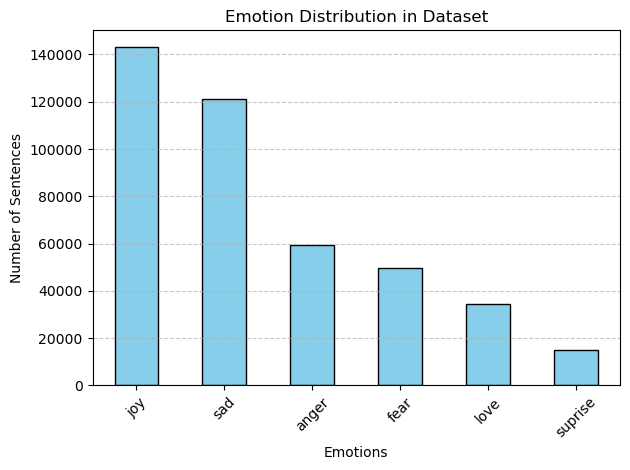

In [11]:
import matplotlib.pyplot as plt

# Plot the emotion distribution as a bar graph
df['emotion'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Emotion Distribution in Dataset")
plt.xlabel("Emotions")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Line Graph

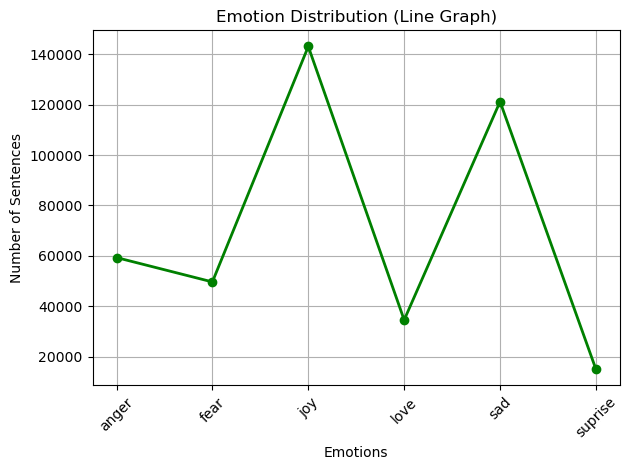

In [12]:
# Get emotion counts sorted by label name
emotion_counts = df['emotion'].value_counts().sort_index()

# Plot as line graph
emotion_counts.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)

plt.title("Emotion Distribution (Line Graph)")
plt.xlabel("Emotions")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.xticks(ticks=range(len(emotion_counts)), labels=emotion_counts.index, rotation=45)
plt.tight_layout()
plt.show()


Save Bar Graph

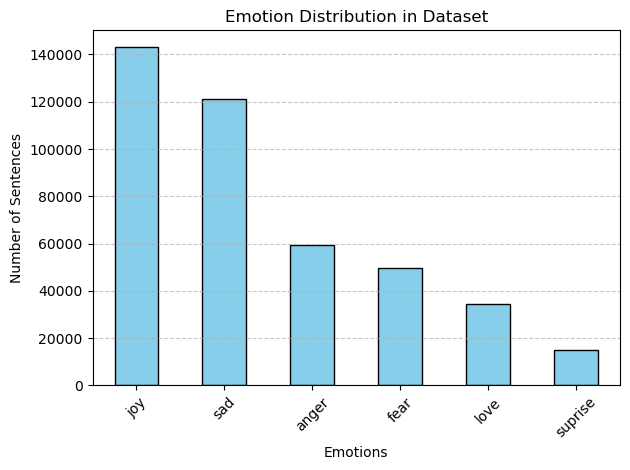

In [13]:
# Plot the bar graph
emotion_counts = df['emotion'].value_counts()
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Graph settings
plt.title("Emotion Distribution in Dataset")
plt.xlabel("Emotions")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("emotion_distribution_bar.png", dpi=300)

# Optional: Show the plot
plt.show()


Cnfusion Matrix

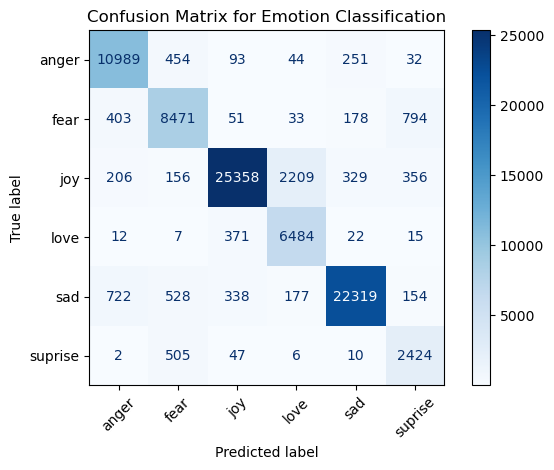

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Features and labels
X = df['sentence']
y = df['emotion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Build pipeline
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
    ('logreg', LogisticRegression(max_iter=2000, class_weight='balanced'))
])

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix for Emotion Classification")
plt.tight_layout()
plt.show()


 Clean/Preprocess the dataset

In [15]:
# Remove rows with missing or empty sentence or emotion
df = df.dropna(subset=['sentence', 'emotion'])
df = df[df['sentence'].str.strip() != '']  # Remove blank text

# Clean text (optional but recommended)
df['sentence'] = df['sentence'].str.lower().str.replace(r"[^a-z\s]", "", regex=True)

# Filter out sentences shorter than 3 words
df = df[df['sentence'].str.split().str.len() > 2]

# Define features (X) and target (y)
X = df['sentence']
y = df['emotion']

print("✅ Cleaned and ready for modeling.")
print(f"Total samples: {len(df)}")


✅ Cleaned and ready for modeling.
Total samples: 422635


Train-test split

In [16]:
X = df['sentence']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 Build model pipeline (TF-IDF + Logistic Regression)

In [17]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english')),
    ('logreg', LogisticRegression(max_iter=2000, class_weight='balanced'))
])

Train the model

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

Evaluate on test set

In [19]:
y_pred = model.predict(X_test)
print("Model Performance on Test Set:\n")
print(classification_report(y_test, y_pred))

Model Performance on Test Set:

              precision    recall  f1-score   support

       anger       0.89      0.93      0.91     11856
        fear       0.84      0.84      0.84      9924
         joy       0.97      0.89      0.92     28610
        love       0.72      0.94      0.82      6911
         sad       0.97      0.92      0.94     24232
     suprise       0.63      0.82      0.71      2994

    accuracy                           0.90     84527
   macro avg       0.83      0.89      0.86     84527
weighted avg       0.91      0.90      0.90     84527



User input and prediction loop

In [ ]:
while True:
    user_input = input("\nEnter a message to predict emotion (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("👋 Exiting. Thanks for using the Emotion Predictor!")
        break
    prediction = model.predict([user_input])[0]
    print(f"💡 Predicted Emotion: {prediction}")


Enter a message to predict emotion (or type 'exit' to quit):  I LOVE YOU


💡 Predicted Emotion: love
